# CA 1 Data Visualisation

GITHUB: https://github.com/izazaka/Data

Minimum Requirements  
  
Scenario:  
You have been retained by a retail company to analyse a dataset based on video games. This analysis will help determine the sales strategy for the company in their upcoming Winter season.    
Each answer MUST have a separate and different visualization that can be easily understood, visually represents the answer, and all data wrangling, analysis, and visualizations must be generated using python.   
The companies CTO also requires you to rationalize all the decisions that you have made in your Jupyter Notebook report.    
This rationalization MUST include your visualization design decisions, how you have engineered the data, feature selection and any other information that you deem relevant.   
  


Requirements  

You are required to use the dataset contained within the file “vgsales.csv” and then answer the following questions:  

Part 1: (Column Names are denoted by quotation marks)  [0-40]
What are the top 5 games by global sales?  
Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?  
What is the distribution of the most popular 4 game genres?  
Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  
What are the 3 most common “developer” in the dataset? 

Part 2   [0-10]
You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario.  
Part3:   [0-50] 
You must explain, in detail,    
why you chose the specific methods to engineer the data and how you achieved this in python (Part 1/Part 2)  
why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)  
what design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)  
what your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)    
Note that all written work MUST be completed in Jupyter Notebook Markdown (please review “Jupyter Notebook Tutorial” Notes in Moodle if you are unsure of this), NOT in code comments.
  
All Code must be included in code blocks (As normal). No other upload will be accepted.  
  


## Libraries

In [1]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

from scipy import stats

sns.set()

# EDA

In [2]:
vg = pd.read_csv("vgsales.csv")

In [67]:
vg.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E


In [4]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
vg.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [101]:
vg.replace('missing_value', pd.NA, inplace=True)

In [6]:
vg.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [9]:
isnull = vg.isnull().sum()

nperc = pd.DataFrame((isnull / (len(vg))) * 100)

nperc.columns = ["% of NaN"]

nperc.tail()

,% of NaN
Critic_Count,51.330821
User_Score,40.098092
User_Count,54.602548
Developer,39.613613
Rating,40.486871


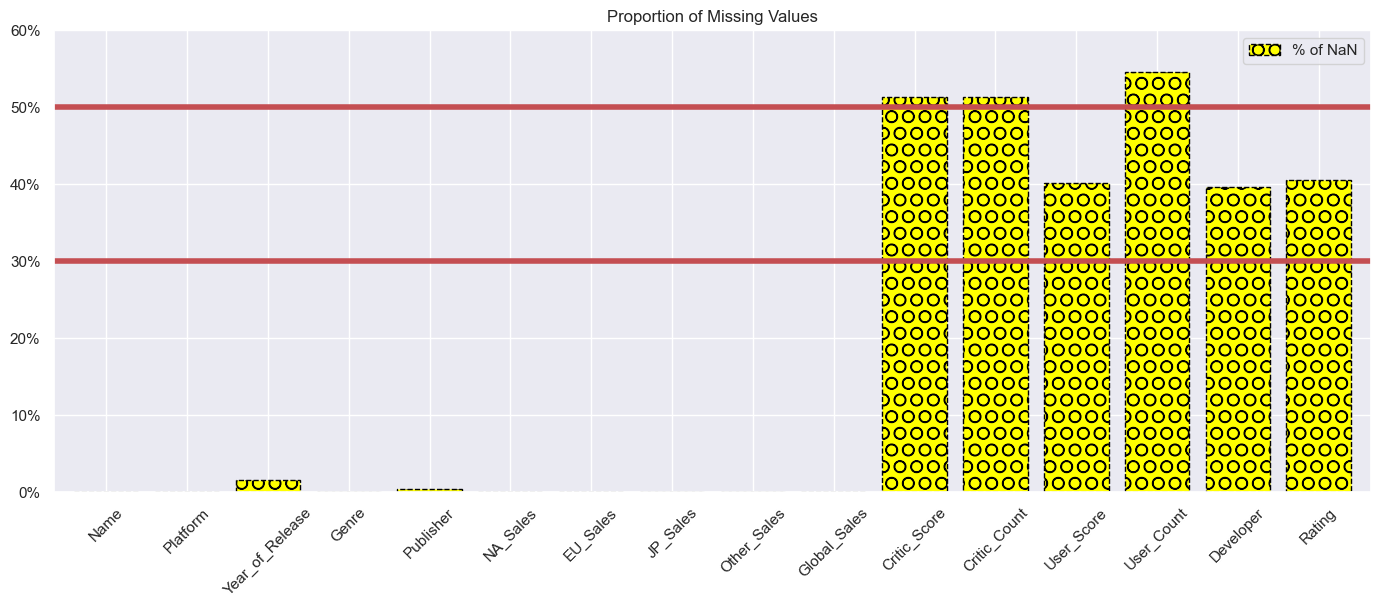

In [39]:
nperc.plot(kind = "bar", color = "yellow", figsize = (17,6),
          width = 0.8, edgecolor = "black", hatch = "O", 
          linestyle = "--")

plt.axhline(y = 50, linewidth = 4, color = 'r', 
           linestyle = "-")
plt.axhline(y = 30, linewidth = 4, color = 'r', 
           linestyle = "-")


plt.title("Proportion of Missing Values")

plt.yticks(ticks = plt.yticks()[0], labels=[f"{int(tick)}%" for tick in plt.yticks()[0]])
plt.xticks(rotation = 45);



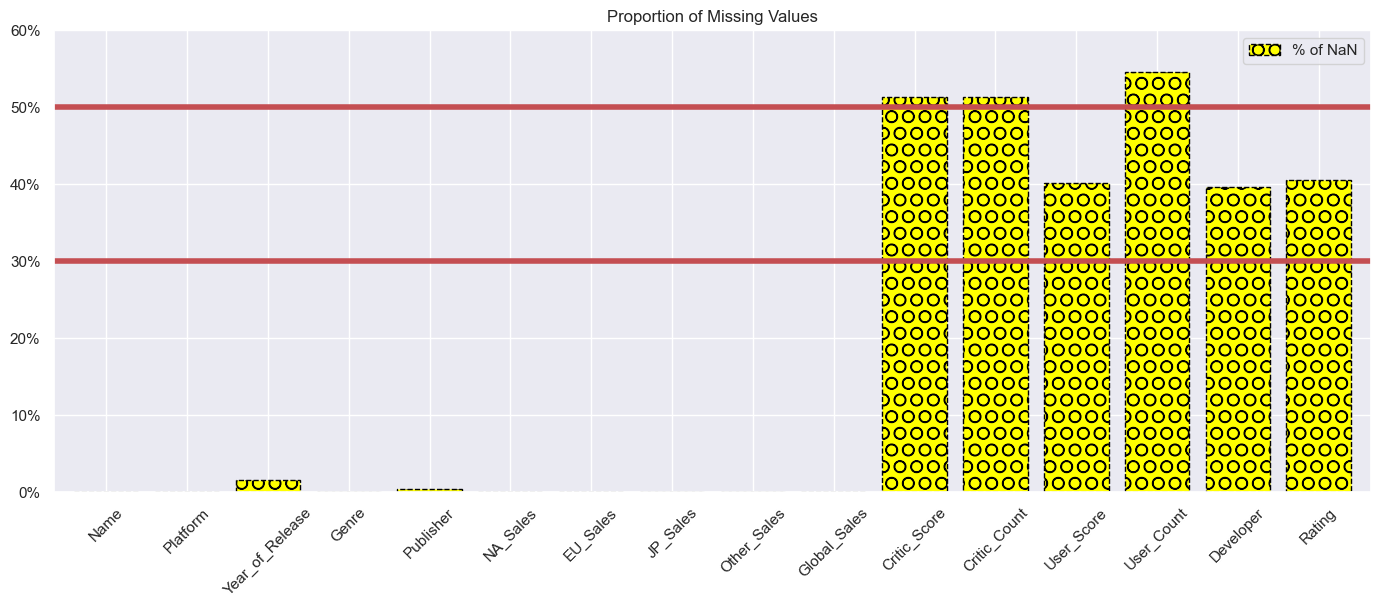

In [39]:
nperc.plot(kind = "bar", color = "yellow", figsize = (17,6),
          width = 0.8, edgecolor = "black", hatch = "O", 
          linestyle = "--")

plt.axhline(y = 50, linewidth = 4, color = 'r', 
           linestyle = "-")
plt.axhline(y = 30, linewidth = 4, color = 'r', 
           linestyle = "-")


plt.title("Proportion of Missing Values")

plt.yticks(ticks = plt.yticks()[0], labels=[f"{int(tick)}%" for tick in plt.yticks()[0]])
plt.xticks(rotation = 45);



In [68]:
vg.dropna(subset=["Year_of_Release"], inplace=True)

In [69]:
vg["Year_of_Release"] = vg["Year_of_Release"].astype(int)

### Part 1: (Column Names are denoted by quotation marks)  [0-40]

What are the top 5 games by global sales?  

Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?  

What is the distribution of the most popular 4 game genres?  

Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  

What are the 3 most common “developer” in the dataset? 

### What are the top 5 games by global sales?

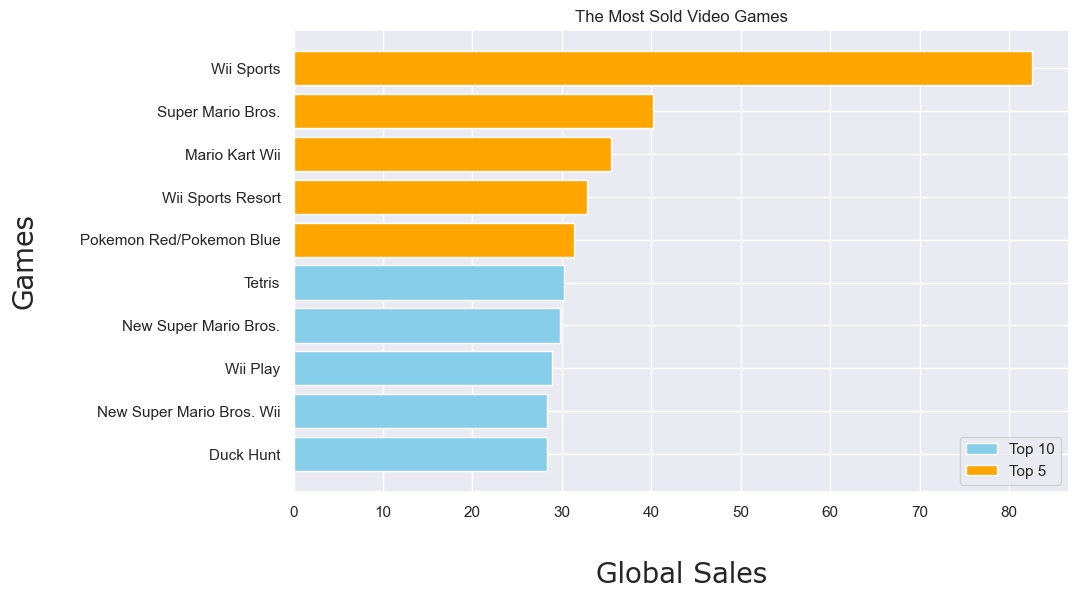

In [62]:
top_10 = vg.sort_values(by = "Global_Sales", ascending = False).head(10)
top_5 = vg.sort_values(by = "Global_Sales", ascending = False).head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_10["Name"], top_10["Global_Sales"], color = "skyblue", label = "Top 10")
plt.barh(top_5["Name"], top_5["Global_Sales"], color = "orange", label = "Top 5")


plt.xlabel("Global Sales", labelpad = 30, fontsize = 20, fontname = "Verdana")
plt.ylabel("Games", labelpad = 30, fontsize = 20, fontname = "Verdana")
plt.title("The Most Sold Video Games")
plt.legend()
plt.gca().invert_yaxis() 
plt.show()


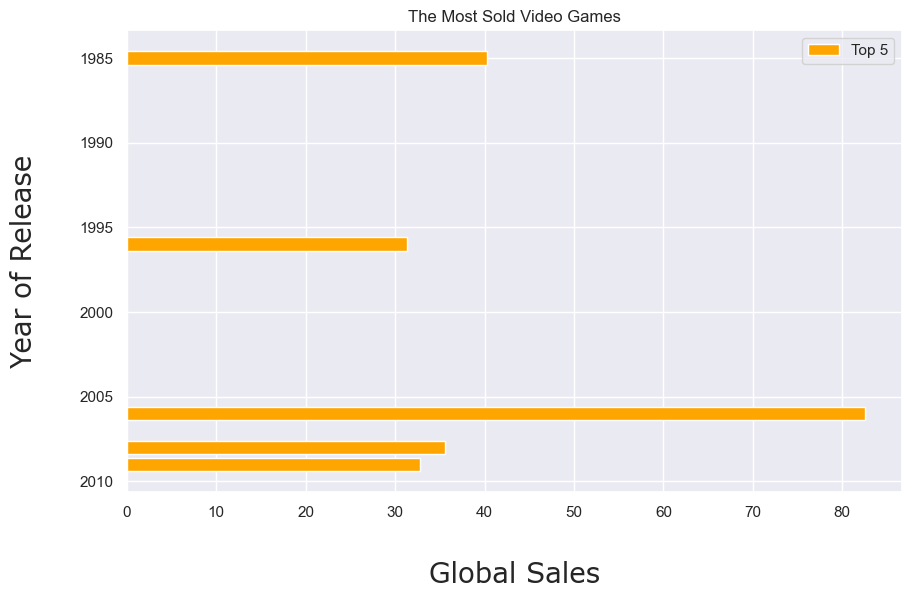

In [79]:
top_10 = vg.sort_values(by = "Global_Sales", ascending = False).head(10)
top_5 = vg.sort_values(by = "Global_Sales", ascending = False).head(5)

plt.figure(figsize=(10, 6))
#plt.barh(top_10["Year_of_Release"], top_10["Global_Sales"], color = "skyblue", label = "Top 10")
plt.barh(top_5["Year_of_Release"], top_5["Global_Sales"], color = "orange", label = "Top 5")


plt.xlabel("Global Sales", labelpad = 30, fontsize = 20, fontname = "Verdana")
plt.ylabel("Year of Release", labelpad = 30, fontsize = 20, fontname = "Verdana")


ax.set(yticks=np.arange(1980, 2020))


plt.title("The Most Sold Video Games")
plt.legend()
plt.gca().invert_yaxis() 
plt.show()


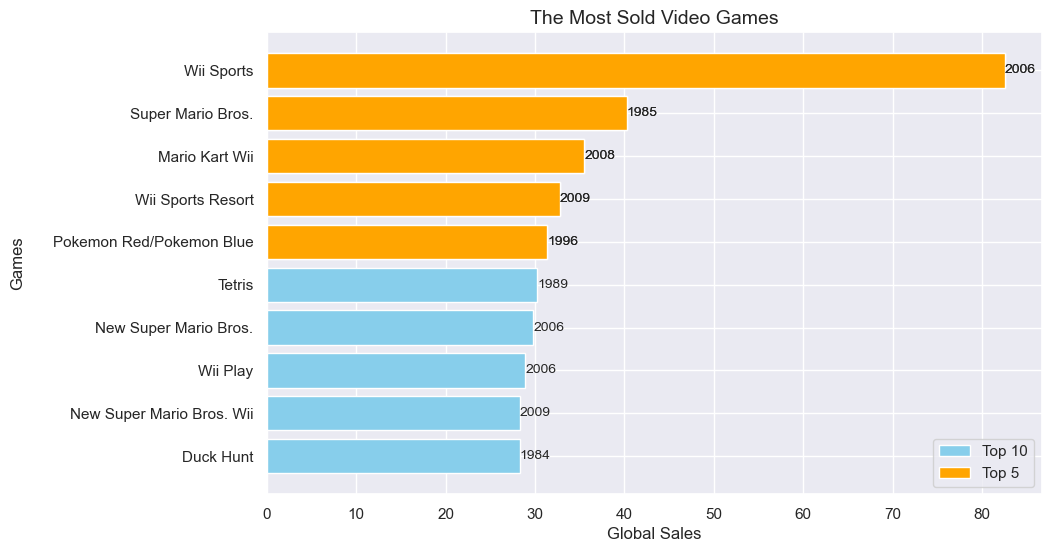

In [70]:
import matplotlib.pyplot as plt

# Assuming your dataset is in a DataFrame named "vg"
top_10 = vg.sort_values(by="Global_Sales", ascending=False).head(10)
top_5 = vg.sort_values(by="Global_Sales", ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_10["Name"], top_10["Global_Sales"], color="skyblue", label="Top 10")
plt.barh(top_5["Name"], top_5["Global_Sales"], color="orange", label="Top 5")

plt.xlabel("Global Sales", fontsize=12, fontname="Arial")  # Adjust fontsize and fontname
plt.ylabel("Games", fontsize=12, fontname="Arial", labelpad=20)  # Adjust fontsize, fontname, and labelpad
plt.title("The Most Sold Video Games", fontsize=14, fontname="Arial")  # Adjust fontsize and fontname
plt.legend()  # Add legend to display labels

# Annotate each bar with the corresponding year
for index, value in enumerate(top_10["Global_Sales"]):
    plt.text(value, index, str(top_10["Year_of_Release"].iloc[index]), fontsize=10, va='center')

for index, value in enumerate(top_5["Global_Sales"]):
    plt.text(value, index, str(top_5["Year_of_Release"].iloc[index]), fontsize=10, va='center')

plt.gca().invert_yaxis() 
plt.show()


### Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014? 

<Axes: xlabel='NA_Sales', ylabel='JP_Sales'>

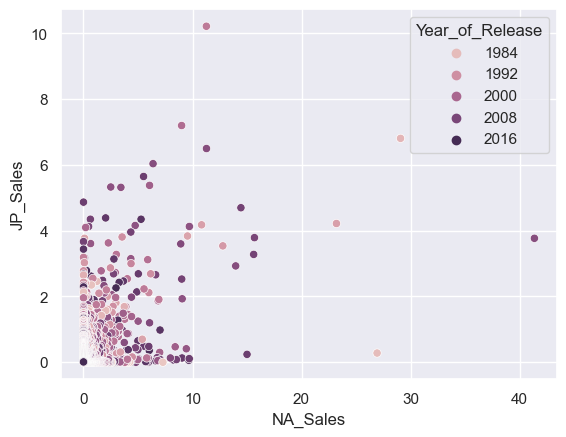

In [89]:
sns.scatterplot(data = vg, x = "NA_Sales", y = "JP_Sales", 
               hue = "Year_of_Release")

<Axes: xlabel='NA_Sales', ylabel='JP_Sales'>

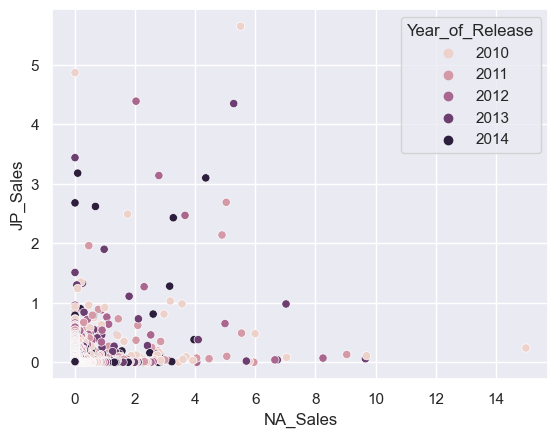

In [91]:


vg_1014 = vg[(vg['Year_of_Release'] >= 2010) & (vg['Year_of_Release'] <= 2014)]


sns.scatterplot(data = vg_1014, x = "NA_Sales", y = "JP_Sales", 
               hue = "Year_of_Release")

<Axes: xlabel='NA_Sales', ylabel='EU_Sales'>

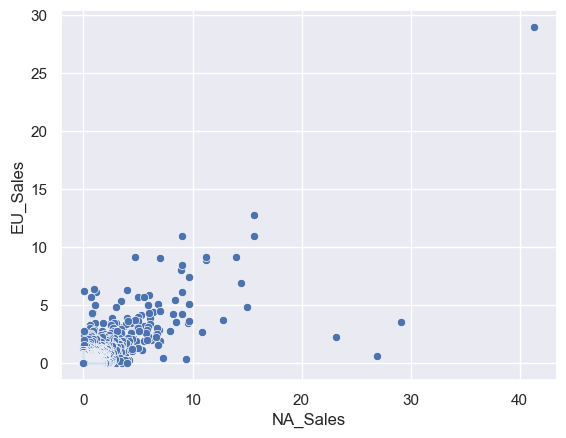

In [87]:
sns.scatterplot(data = vg, x = "NA_Sales", y = "EU_Sales")

<Axes: xlabel='EU_Sales', ylabel='JP_Sales'>

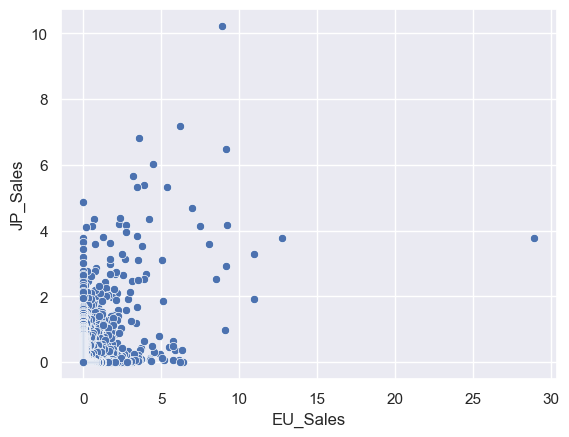

In [88]:
sns.scatterplot(data = vg, x = "EU_Sales", y = "JP_Sales")

In [93]:
vg.tail(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16718,Winning Post 8 2016,PSV,2016,Simulation,Tecmo Koei,0.0,0.0,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


### What is the distribution of the most popular 4 game genres? 

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

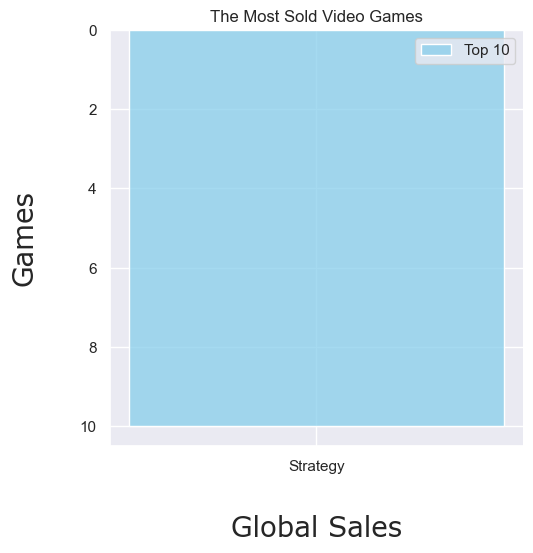

In [98]:
top_10 = vg.sort_values(by = "Genre", ascending = False).head(10)
top_4 = vg.sort_values(by = "Genre", ascending = False).head(4)

plt.figure(figsize=(10, 6))
sns.displot(top_10["Genre"], color = "skyblue", label = "Top 10")
#plt.barh(top_5["Name"], top_5["Genre"], color = "orange", label = "Top 5")


plt.xlabel("Global Sales", labelpad = 30, fontsize = 20, fontname = "Verdana")
plt.ylabel("Games", labelpad = 30, fontsize = 20, fontname = "Verdana")
plt.title("The Most Sold Video Games")
plt.legend()
plt.gca().invert_yaxis() 
plt.show()


/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


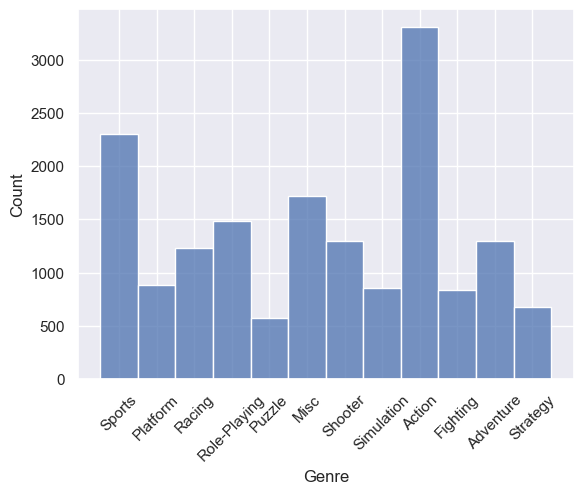

In [109]:
sns.histplot(vg["Genre"])


plt.xticks(rotation = 45);

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


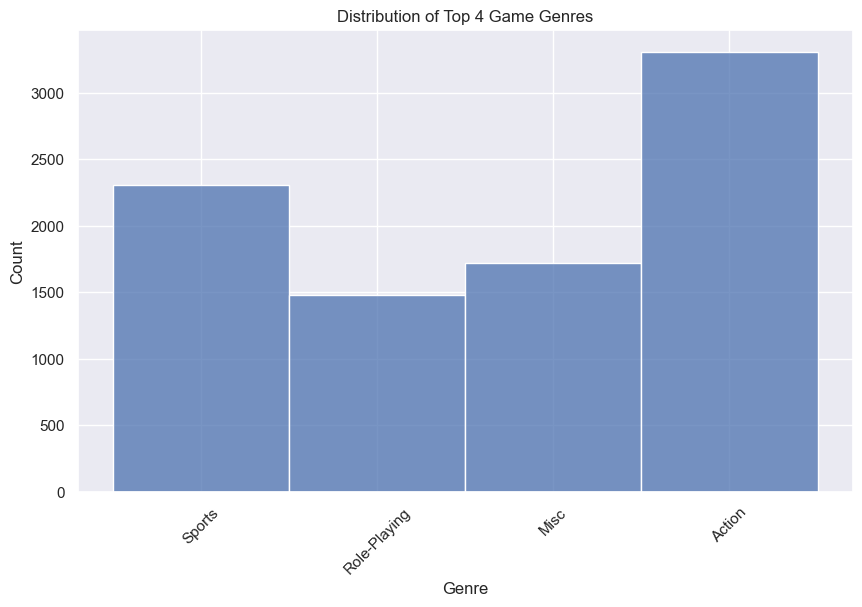

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Determine the top 4 most popular genres
top_genres = vg['Genre'].value_counts().head(4).index

# Step 2: Filter the DataFrame to include only these genres
top_genres_data = vg[vg['Genre'].isin(top_genres)]

# Step 3: Plot the distribution of these genres
plt.figure(figsize=(10, 6))
sns.histplot(data=top_genres_data, x='Genre', stat='count', discrete=True)
plt.title('Distribution of Top 4 Game Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


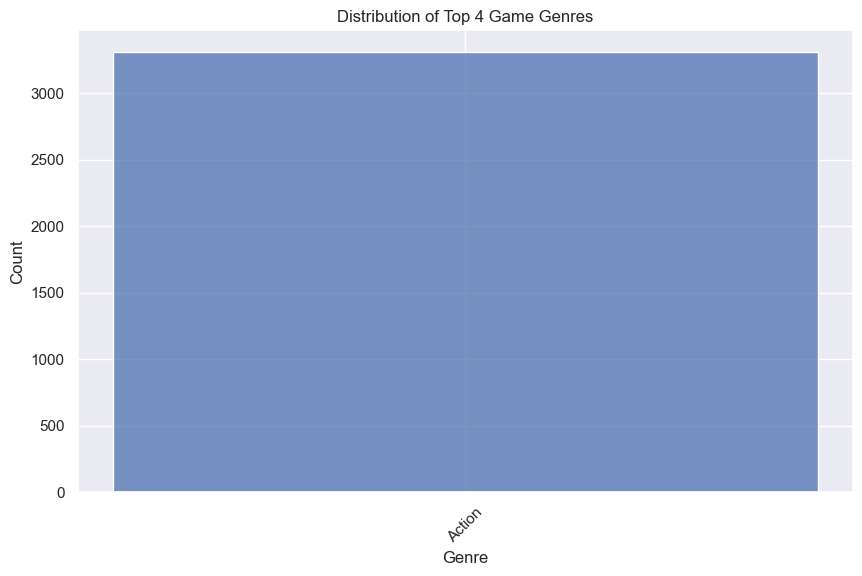

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Determine the top 4 most popular genres
top_genres = vg['Genre'].value_counts().head(1).index

# Step 2: Filter the DataFrame to include only these genres
top_genres_data = vg[vg['Genre'].isin(top_genres)]

# Step 3: Plot the distribution of these genres
plt.figure(figsize=(10, 6))
sns.histplot(data=top_genres_data, x='Genre', stat = 'count', discrete=True)
plt.title('Distribution of Top 4 Game Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


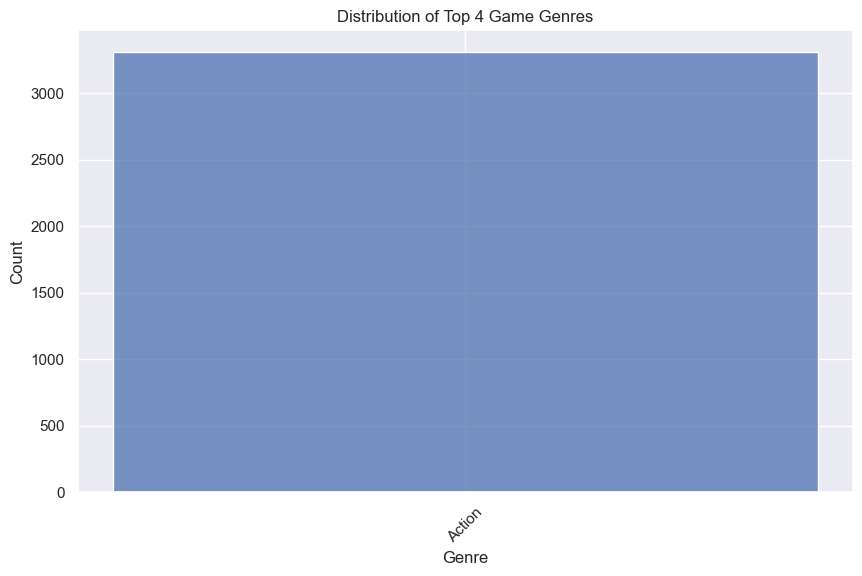

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Determine the top 4 most popular genres
top_genres = vg['Genre'].value_counts().head(1).index

# Step 2: Filter the DataFrame to include only these genres
top_genres_data = vg[vg['Genre'].isin(top_genres)]

# Step 3: Plot the distribution of these genres with bins
plt.figure(figsize=(10, 6))
sns.histplot(data=top_genres_data, x='Genre', stat='count', discrete=True, bins=len(top_genres))
plt.title('Distribution of Top 4 Game Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


###  Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  


/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


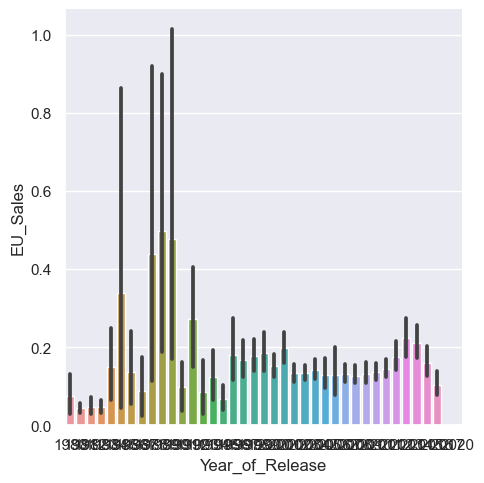

In [116]:
sns.catplot(data = vg, x = "Year_of_Release", y = "EU_Sales", 
            kind = "bar")

### What are the 3 most common “developer” in the dataset? 